# Programming for Data Analysis - ASSIGNMENT


## Python numpy.random package

### 1. Overall purpose of the package

NumPy (Numerical Python) is a Python library that is specialsied and optimised to work very fast and efficient with multidimensional array objects. It is a fundamental library for scientific computing in Python providing high-performance multidimensional array object, and tools for working with them. It relies on packages implemented in another language (e.g. C) to perform efficient and fast computations.

**numpy.random** package is used for efficiently generating whole arrays of sample values from many kinds of probability distributions.

### 2. “Simple random data” and “Permutations” functions

#### Simple random data

A set of several functions that return a various types of random numbers, depending of the parameters passed.
<br>Few examples:

- **rand(_d0, d1, …, dn_)**	Returns random values in a given shape. It creatse an array of the given shape and populates it with random samples from a uniform distribution over the interval [0, 1).

In [40]:
# Importing packages needed for this notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating 2 sets of 3 sets of 4 random values between 0 and 1
x = np.random.rand(2,3,4)
x

array([[[0.17493968, 0.13318884, 0.84398728, 0.87020086],
        [0.54102539, 0.99982111, 0.41662158, 0.05290329],
        [0.89633897, 0.62046772, 0.80156562, 0.5734173 ]],

       [[0.37217646, 0.88831036, 0.27965765, 0.49810204],
        [0.95228929, 0.21673992, 0.77418445, 0.50283857],
        [0.29091798, 0.34664679, 0.48360184, 0.31533745]]])

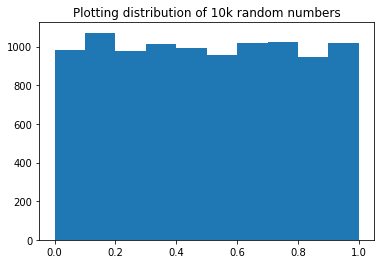

In [20]:
# Plotting distribution of 10k random numbers
x = np.random.rand(10000)
plt.title("Plotting distribution of 10k random numbers")
plt.hist(x)
plt.show()

***
- **randn(_d0, d1, …, dn_)**	Returns a sample(s) from the “standard normal” distribution. If positive, int_like or int-convertible arguments are provided, randn generates an array of shape (d0, d1, ..., dn), filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1 (if any of the d_i are floats, they are first converted to integers by truncation). A single float randomly sampled from the distribution is returned if no argument is provided.

In [26]:
# Generating a single Python float
np.random.randn()

-1.3374446130866584

In [27]:
# Generating 2x2 random samples from N(mu,sigma**2)
sigma = 2
mu = 4
sigma * np.random.randn(2, 2) + mu

array([[1.57851541, 5.14072117],
       [2.17244298, 3.32342049]])

***
- **random\_sample([_size_])**	Returns random floats in the half-open interval [0.0, 1.0). Results are from the “continuous uniform” distribution over the stated interval.

In [8]:
np.random.random_sample((3, 2, 4))

array([[[0.29105162, 0.42524967, 0.46514163, 0.1456869 ],
        [0.81083346, 0.71796305, 0.86740461, 0.09158114]],

       [[0.64367545, 0.0631807 , 0.79439918, 0.37749852],
        [0.61897001, 0.73609359, 0.23150347, 0.70019214]],

       [[0.11148499, 0.22464805, 0.51943895, 0.91303778],
        [0.37620545, 0.36097736, 0.4421671 , 0.30068578]]])

***
#### Permutations

Contains two functions that "randomise" given dataset:

- **shuffle(_arr_)**	Modifies a sequence in-place by shuffling its contents. This function only shuffles the array along the first axis of a multi-dimensional array. The order of sub-arrays is changed but their contents remains the same.

In [32]:
# Print integers between 0 and 11
arr = np.arange(11)
print(arr)
# Shuffle them now and print
np.random.shuffle(arr)
print(arr)

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 9  1  3  2  8  4  5 10  7  0  6]


***
- **permutation(arr)**	Randomly permutes a sequence, or return a permuted range. If x is a multi-dimensional array, it is only shuffled along its first index.

In [34]:
# Printing a permutation of range(0,11)
print(np.random.permutation(range(0,11)))

[ 0  1  4  3  7  5 10  8  9  6  2]


In [38]:
# Permuting an ordered 4x4 multidimensional array
arr = np.arange(16).reshape((4, 4))
np.random.permutation(arr)

array([[ 4,  5,  6,  7],
       [ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

### 3. Numpy "Distributions" functions

Probability distributions are fundamental to statistics, just like data structures are to computer science. There are hundreds of probability distributions, but only a handfull of them turn up consistently in practice. Probability distributions describe what we think the probability of each outcome is.

- **geometric(p[, size])** Draws samples from the geometric distribution. Bernoulli trials are experiments with one of two outcomes: success or failure (an example of such an experiment is flipping a coin). The geometric distribution models the number of trials that must be run in order to achieve success. It is therefore supported on the positive integers, k = 1, 2, ... 
The probability mass function of the geometric distribution is
$ f(k) = (1 - p)^{k - 1} p $, 
where p is the probability of success of an individual trial.

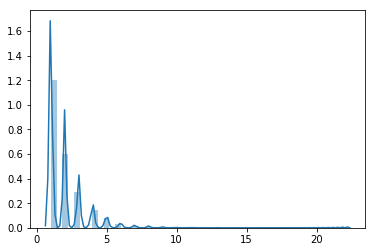

0.5039

In [43]:
# Draw ten thousand values from the geometric distribution, with the probability of an individual success equal to 0.5
z = np.random.geometric(p=0.5, size=10000)
sns.distplot(z)
plt.show()

# Number of trials succeeded after a single run
(z == 1).sum() / 10000

***
- **logseries(p[, size])**	Draws samples from a logarithmic series distribution. Samples are drawn from a log series distribution with specified shape parameter, 0 < p < 1.
<br>
The probability density for the Log Series distribution is
$ P(k) = \frac{-p^k}{k \ln(1-p)} $,
where p = probability.
The log series distribution is frequently used to represent species richness and occurrence, first proposed by Fisher, Corbet, and Williams in 1943. It may also be used to model the numbers of occupants seen in cars.

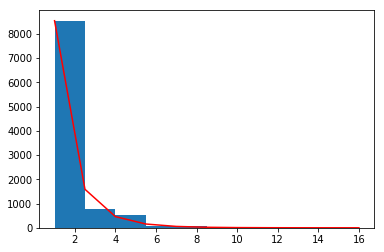

In [48]:
# Draw samples from the distribution
a = .6
s = np.random.logseries(a, 10000)
count, bins, ignored = plt.hist(s)

# Plot against distribution
def logseries(k, p):
    return -p**k/(k*np.log(1-p))

plt.plot(bins, logseries(bins, a)*count.max() / logseries(bins, a).max(), 'r')
plt.show()

***
- **normal([loc, scale, size])** Draws random samples from a normal (Gaussian) distribution. The probability density function of the normal distribution, first derived by De Moivre and 200 years later by both Gauss and Laplace independently, is often called the Bell curve because of its characteristic shape.
The normal distributions occurs often in nature. For example, it describes the commonly occurring distribution of samples influenced by a large number of tiny, random disturbances, each with its own unique distribution.
<br>
The probability density for the Gaussian distribution is
$ p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }}
e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} } $,
where $ \mu $ is the mean and $ \sigma $ the standard deviation. The square of the standard deviation, $ \sigma^2 $, is called the variance.
The function has its peak at the mean, and its “spread” increases with the standard deviation.

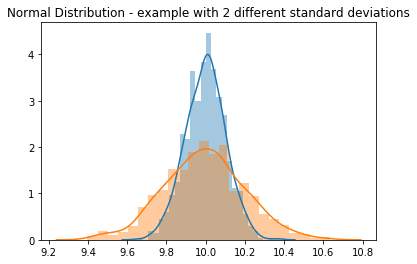

In [50]:
# Example with 2 different values of standard deviation, with the same mean and output shape
for i in [0.1, 0.2]:
    sns.distplot(np.random.normal(10, i, 1000))
plt.title('Normal Distribution - example with 2 different standard deviations')
plt.show()

***
- **poisson([lam, size])**	Draw samples from a Poisson distribution. The Poisson distribution is the limit of the binomial distribution for large N.
The Poisson distribution 
$ f(k; \lambda)=\frac{\lambda^k e^{-\lambda}}{k!} $ 
For events with an expected separation $ \lambda $ the Poisson distribution $ f(k; \lambda) $ describes the probability of k events occurring within the observed interval $ \lambda $.
The Poisson distribution is popular for modelling the number of times an event occurs in an interval of time or space.

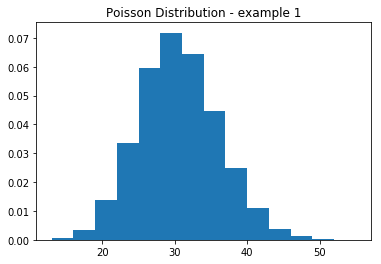

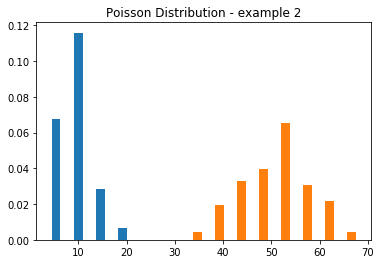

In [70]:
# Draw samples from the distribution and plot histogram
s = np.random.poisson(30, 10000)
count, bins, ignored = plt.hist(s, 14, density=True)
plt.title('Poisson Distribution - example 1')
plt.show()

# Draw each 100 values for lambda 10 and 50 and plot
s = np.random.poisson(lam=(10., 50.), size=(100, 2))
count, bins, ignored = plt.hist(s, 14, density=True)
plt.title('Poisson Distribution - example 2')
plt.show()

***
- **rayleigh([scale, size])**	Draws samples from a Rayleigh distribution. The probability density function for the Rayleigh distribution is 
$ P(x;scale) = \frac{x}{scale^2}e^{\frac{-x^2}{2 \cdotp scale^2}} $.
<br>
A Rayleigh distribution is often observed when the overall magnitude of a vector is related to its directional components. One example where the Rayleigh distribution naturally arises is when wind velocity is analyzed in two dimensions. Assuming that each component is uncorrelated, normally distributed with equal variance, and zero mean, then the overall wind speed (vector magnitude) will be characterized by a Rayleigh distribution. A second example of the distribution arises in the case of random complex numbers whose real and imaginary components are independently and identically distributed Gaussian with equal variance and zero mean. In that case, the absolute value of the complex number is Rayleigh-distributed.

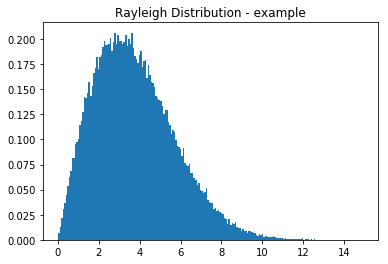

In [71]:
# Draw values from the distribution and plot the histogram
plt.title('Rayleigh Distribution - example')
values = plt.hist(np.random.rayleigh(3, 100000), bins=200, density=True)

### 4. "Seeds" in generating pseudorandom numbers

A random seed is a number (or vector) used to initialize a pseudorandom number generator.
<br>
For a seed to be used in a pseudorandom number generator, it does not need to be random. Because of the nature of number generating algorithms, so long as the original seed is ignored, the rest of the values that the algorithm generates will follow probability distribution in a pseudorandom manner.

- ***RandomState([seed])*** Container for the Mersenne Twister pseudo-random number generator. RandomState exposes a number of methods for generating random numbers drawn from a variety of probability distributions. In addition to the distribution-specific arguments, each method takes a keyword argument size that defaults to None. If size is None, then a single value is generated and returned. If size is an integer, then a 1-D array filled with generated values is returned. If size is a tuple, then an array with that shape is filled and returned.

In [74]:
rng = np.random.RandomState(123456)
rng.randn(5)

array([ 0.4691123 , -0.28286334, -1.5090585 , -1.13563237,  1.21211203])

***
- **seed([seed])** Seed the generator. This method is called when RandomState is initialized.
<br>
If we set the np.random.seed(a_fixed_number), every time we call the numpy's other random function, the result will be the same:

In [80]:
# Calling it first time
np.random.seed(0)
np.random.rand(3)

array([0.5488135 , 0.71518937, 0.60276338])

In [79]:
# Calling it again
np.random.seed(0)
np.random.rand(3)

array([0.5488135 , 0.71518937, 0.60276338])

## References

[1] https://docs.scipy.org/doc/numpy/
<br>
[2] http://www.numpy.org/
<br>
[3] https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html#
<br>
[4] https://en.wikipedia.org/wiki/NumPy
<br>
[5] http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/
<br>
[6] https://en.wikipedia.org/wiki/Normal_distribution
<br>
[7] https://en.wikipedia.org/wiki/Geometric_distribution
<br>
[8] https://en.wikipedia.org/wiki/Poisson_distribution
<br>
[9] https://en.wikipedia.org/wiki/Rayleigh_distribution
<br>
[10] https://en.wikipedia.org/wiki/Mersenne_Twister